# The Lego Collector's Dilemma  

## Problem statement

You are a die hard Lego enthusiast wishing to collect as many board sets as you can. But before that you wish to be able to predict the price of a new lego product before its price is revealed so that you can budget it from your revenue. Since (luckily!), you are a data scientist in the making, you wished to solve this problem yourself. This dataset contains information on lego sets scraped from lego.com. Each observation is a different lego set with various features like how many pieces in the set, rating for the set, number of reviews per set etc. Your aim is to build a linear regression model to predict the price of a set.


## About the Dataset:
The snapshot of the data, you will be working on :

![Dataset](../images/lego_data.PNG)

You can see that some of the features of `review_difficulty`, `theme_name` and `Country Name` in the data are textual in nature. Don't worry, we have made things simple for you with some behind-the-scenes data preprocessing.  We have also modified the feature of `age`. You will be learning about all these preprocessing techinques in a later concept. For now let us concentrate on getting those Lego sets in your hands soon. :) 

![Dataset](../images/new_le.png)


The dataset has details of 9910 lego sets with the following 10 features

|Feature|Description|
|-----|-----|
|age|Which age categories it belongs to|
|list_price|price of the set (in $)|
|num_reviews|number of reviews per set|
|piece_count| number of pieces in that lego set|
|play_star_rating|ratings|
|review_difficulty|difficulty level of the set|
|star_rating|ratings|
|theme_name|which theme it belongs|
|val_star_rating|ratings|
|country|country name|










## Introduction
Our aim here is to predict the price of lego given its other features. This we will achieve using linear regression. To learn more about linear regression, you may go through this link: https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86.

Instructions are given at each step. I hope you find it useful and interesting.

## Importing Libraries and Acquiring Data
First task is to import the required libraries. You can add libraries along the time you require them. 

When we are given one dataset, we ought to divide them into two datasets, so that we train our model on one of the dataset, and then test it on the remaining dataset.
This can be done using train_test_split function.

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn import datasets, linear_model, metrics 

data=pd.read_csv("../data/lego_final.csv")

from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(data, test_size=0.3, random_state=42)

## Analyzing the Dataset
It is very important to go through the datasets that one is working with.
By analyzing the dataset, one can:
    1. Learn about the different features, he or she will be working with.
    2. Find about the different type of entries in the dataset (for example, 'int', 'float')
    3. Find about the null entries in the dataset. If null entries are there, they should be well taken care of. (Though, in the given dataset, we find that there is no null entry, so methods to tackle null entries will be explained later)

In [243]:
print(data.columns.values)
# This tells us all the columns that we will be dealing with
print("The shape of our dataset is" + str(data.shape))
# Shape of our dataset
print('-'*50)
print(data.head())
# First few rows of our dataset
print('-'*50)
print(data.info())
# Information about each row of the dataset
print('-'*50)
# print(train_dataset.describe())
# More vision to each of the feature.

['ages' 'list_price' 'num_reviews' 'piece_count' 'play_star_rating'
 'review_difficulty' 'star_rating' 'theme_name' 'val_star_rating'
 'country']
The shape of our dataset is(12261, 10)
--------------------------------------------------
   ages  list_price  num_reviews  piece_count  play_star_rating  \
0    19       29.99            2          277               4.0   
1    19       19.99            2          168               4.0   
2    19       12.99           11           74               4.3   
3     5       99.99           23         1032               3.6   
4     5       79.99           14          744               3.2   

   review_difficulty  star_rating  theme_name  val_star_rating  country  
0                  0          4.5           0              4.0       20  
1                  2          5.0           0              4.0       20  
2                  2          4.3           0              4.1       20  
3                  0          4.6           1              4.3   

## Data Visualization
Plotting the data beforehand is a good practice. One learns about the variation of 'y' value (in our case, it is the price of our Lego-set) This helps in understanding the features in a better manner and engineering new features as well (Dont worry about this, this will be discussed later, after you grasp the fundamentals ;) ).

Many a times, there are features which affect our 'y' value more than the other ones. It is very helpful to find the ones, which affect the 'y' value the most and the least too. We can remove the features which dont effect our 'y' value as it will result in less processing time. Though, this is not the case right now, but will be beneficial in advance stages.


 mu = 65.14 and sigma = 91.54



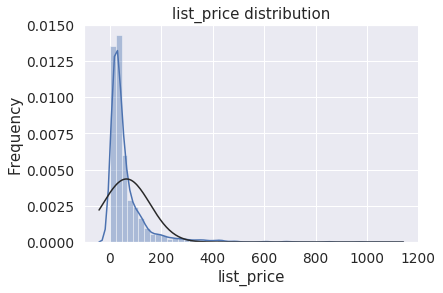

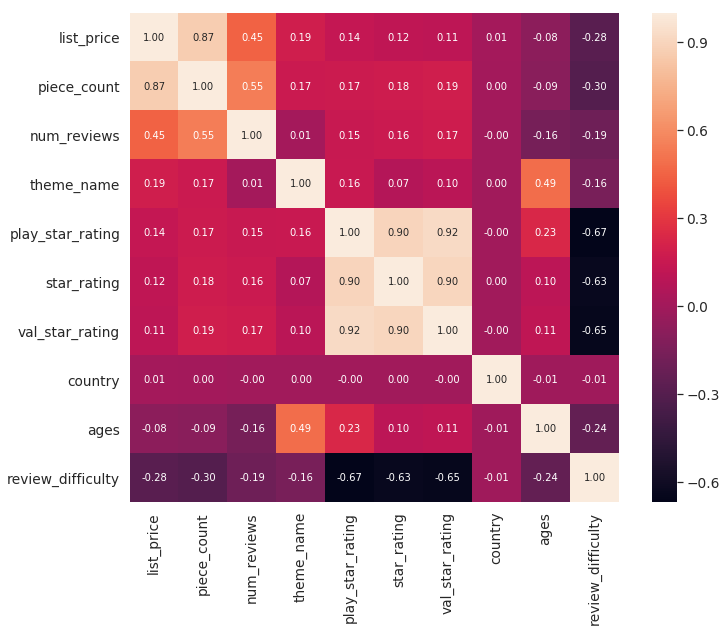

In [229]:
sns.distplot(train_dataset['list_price'], fit = norm)

(mu, sigma) = norm.fit(train_dataset['list_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
plt.ylabel('Frequency')
plt.title('list_price distribution')


#Once you've expertised what has been given to you, you uncomment the code given below to find another way to visualize data.
# fig = plt.figure()
# res = stats.probplot(train_dataset['list_price'], plot=plt)
# plt.show()

# print("Skewness: %f" % train_dataset['list_price'].skew())
# print("Kurtosis: %f" % train_dataset['list_price'].kurt())


#Here we get to know about the correlation coefficient of different features with the list_price 
corrmat = train_dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'list_price')['list_price'].index
cm = np.corrcoef(train_dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Individually inspecting the features
Here we plot each feature against the 'list_price'. This will let us know about any outliers which is 'polluting' our dataset.

Correlation Coefficient: 0.8675377795957304


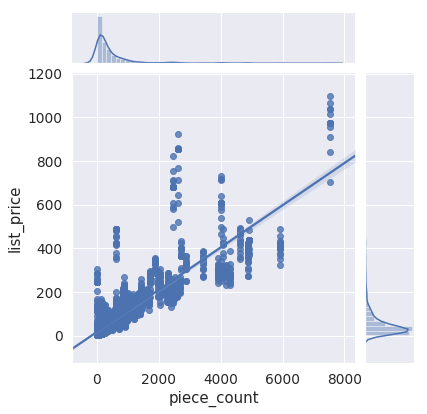

In [241]:
#Uncomment this after you go through the present code, this code will explain you another way to look at the correlation
# between our 'list_price' and the other feature.
# var = 'piece_count'
# data = pd.concat([train_dataset['list_price'], train_dataset[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="list_price", data=data)
# fig.axis(ymin=0, ymax=1200)



sns.jointplot(x=train_dataset['piece_count'], y=train_dataset['list_price'], kind='reg')
earlier=np.corrcoef(train_dataset['list_price'], train_dataset['piece_count'])[0,1]
print("Correlation Coefficient: " + str(earlier))



Here we see the outliers on the bottom-right side, Let's remove them and then find out the new Correlation Coefficient
Earlier: 0.4486136540757351
Now: 0.5193384953362212


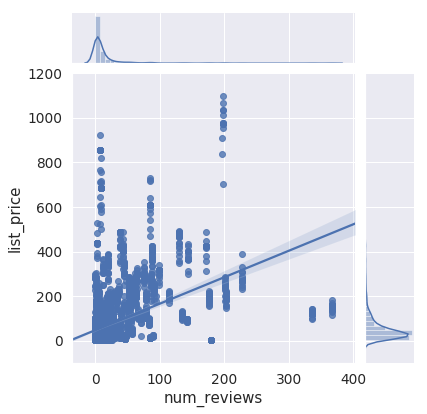

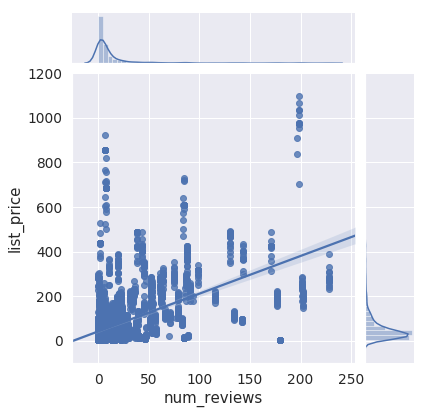

In [231]:
sns.jointplot(x=train_dataset['num_reviews'], y=train_dataset['list_price'], kind='reg')
earlier=np.corrcoef(train_dataset['list_price'], train_dataset['num_reviews'])[0,1]

train_dataset = train_dataset.drop(train_dataset[(train_dataset['num_reviews']>300) & (train_dataset['list_price']<400)].index).reset_index(drop=True)
sns.jointplot(x=train_dataset['num_reviews'], y=train_dataset['list_price'], kind='reg')
after=np.corrcoef(train_dataset['list_price'], train_dataset['num_reviews'])[0,1]

print("Here we see the outliers on the bottom-right side, Let's remove them and then find out the new Correlation Coefficient")
print("Earlier: " + str(earlier))
print("Now: " + str(after))

0.19000223424617124

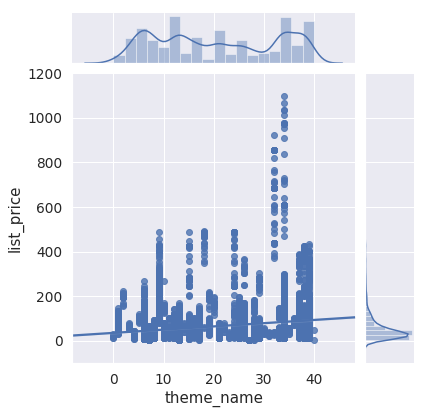

In [232]:
sns.jointplot(x=train_dataset['theme_name'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['theme_name'])[0,1]
print("Correlation Coefficient: " + str(earlier))

0.13634365819050553

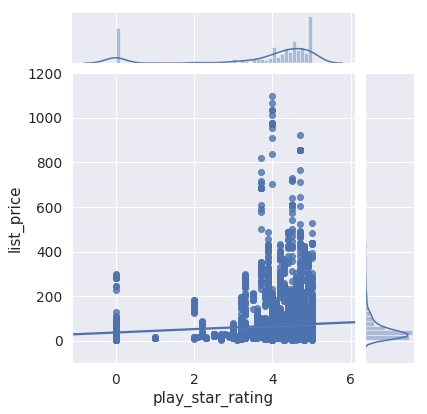

In [233]:
sns.jointplot(x=train_dataset['play_star_rating'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['play_star_rating'])[0,1]
print("Correlation Coefficient: " + str(earlier))

0.11837265946931658

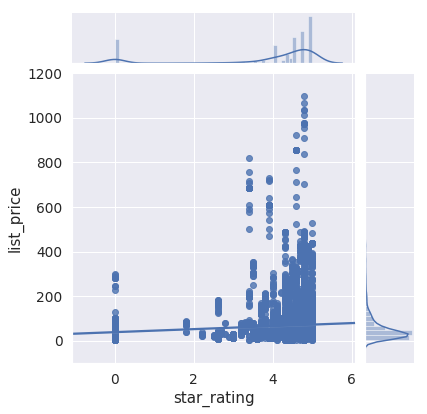

In [234]:
sns.jointplot(x=train_dataset['star_rating'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['star_rating'])[0,1]
print("Correlation Coefficient: " + str(earlier))

0.1063299196050289

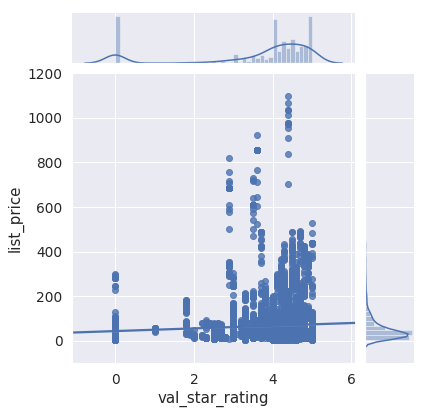

In [235]:
sns.jointplot(x=train_dataset['val_star_rating'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['val_star_rating'])[0,1]
print("Correlation Coefficient: " + str(earlier))

0.012974762914412968

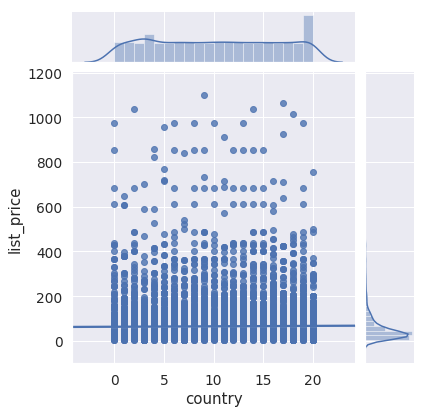

In [236]:
sns.jointplot(x=train_dataset['country'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['country'])[0,1]
print("Correlation Coefficient: " + str(earlier))
#As we can see in the graph and also from the correlation coefficient,
#country name hardly effects the price of lego. So we will remove this feature, and will find that it does not affect 
# the list_price, as we have discussed above.

-0.07578530326516056

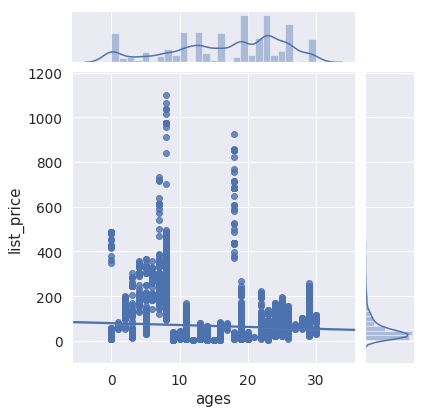

In [237]:
sns.jointplot(x=train_dataset['ages'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['ages'])[0,1]
print("Correlation Coefficient: " + str(earlier))
#Correlation coefficient says that it affects the price of lego-set by only a little amount
# so we may try to remove this feature too.

-0.2803877781904865

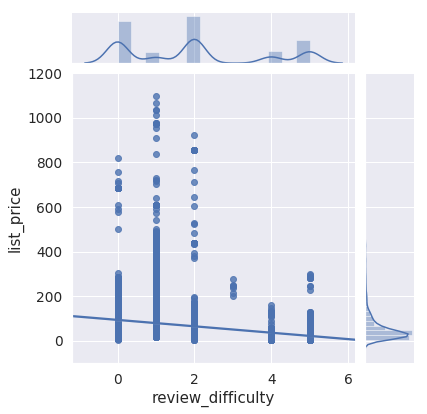

In [238]:
sns.jointplot(x=train_dataset['review_difficulty'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['review_difficulty'])[0,1]
print("Correlation Coefficient: " + str(earlier))

## Training and Evaluation of Model
As we have analyzed each feature, let us find out the accuracy of our model.
In the previous section we have dropped outliers from one feature, where it is obvious. You may try out removing outliers from others features and then try to check your accuracy. 

In [240]:
train_Y=train_dataset['list_price']
train_X=train_dataset.drop(['list_price'], axis=1)
test_Y=test_dataset['list_price']
test_X=test_dataset.drop(['list_price'], axis=1)

reg = linear_model.LinearRegression() 
  
# train the model using the training sets
reg.fit(train_X, train_Y) 

#Find the accuracy by checking it with the test_dataset

score = reg.score(test_X, test_Y)
print('Variance score: {}'.format(score)) 



Variance score: 0.7863642292419029


## Congratulations!!
You deserve it! Kudos to you completing your first Machine Learning assignment. But you can learn many more things from this assignment only. As you may have noticed some commented code snippets, try running them and try to analyze more about this assignment. You can also try to explore the features more by removing the outliers from some feature, or you may even engineer new features once you learn about them. It's all upto you. :)